In [75]:
import torch
import torch.nn as nn
import zipfile
import numpy as np
import torch.nn.init as init
import time
import matplotlib.pyplot as plt
from IPython import display

In [76]:
def load_data_airfoil():
    data = np.genfromtxt('/home/data/airfoil_self_noise.dat',delimiter='\t')
    data = (data-data.mean(axis=0))/data.std(axis=0)
    return torch.tensor(data[:1500,:-1],dtype=torch.float32),torch.tensor(data[:1500,-1],dtype=torch.float32)
features,labels = load_data_airfoil()
labels.shape

torch.Size([1500])

In [77]:
class LinNet(nn.Module):
    def __init__(self,num_inputs):
        super(LinNet,self).__init__()
        self.linear = nn.Linear(num_inputs,1)
    def forward(self,x):
        y = self.linear(x)
        return y

In [78]:
def squared_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2/2
loss =squared_loss

In [79]:
def sgd(params,state,hyperparams):
    for param in params:
        param.data -= hyperparams['lr']*param.grad.data

In [83]:
def train_ch7(optimizer_fn,states,hyperparams,features,labels,batch_size=10,num_epochs=2):
    net = LinNet(features.shape[1])
    init.normal_(net.linear.weight,mean=0,std=0.01)
    init.constant_(net.linear.bias,val=0)
    def evl_loss():

        y_hat = net(features)
        print('y_hat.shape:',y_hat.shape)
        print('labels',labels.shape)
        # print('Y.shape:',Y.shape)
        l = loss(y_hat,labels).mean().item()
        return l
    ls = [evl_loss()]
    data = torch.utils.data.TensorDataset(features,labels)
    data_iter = torch.utils.data.DataLoader(data,batch_size,shuffle=True)
    for epoch in range(num_epochs):
        start = time.time()
        for batch_i,(X,Y) in enumerate(data_iter):
            y_hat = net(X)
            l = loss(y_hat,Y).mean()
            if net.linear.weight.grad is not None:
                net.linear.weight.grad.data.zero_()
                net.linear.bias.grad.data.zero_()
            l.backward()
            optimizer_fn([net.linear.weight,net.linear.bias],states,hyperparams) 
            if (batch_i+1)*batch_size %100 ==0:
                ls.append(evl_loss())
    print('loss:%f,%f sec per epoch'%(ls[-1],time.time()-start))  
    display.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize'] = (12,12)
    plt.plot(np.linspace(0,num_epochs,len(ls)),ls)
    plt.xlabel('epoch')
    plt.ylabel('loss')

y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
loss:0.247489,0.007012 sec per epoch


/tmp/ipykernel_855/104467786.py:29: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


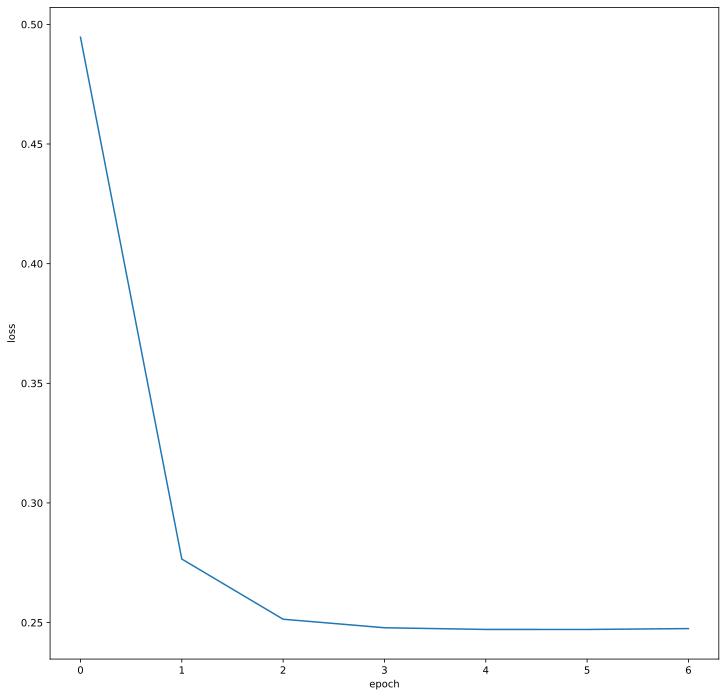

In [84]:
def train_sgd(lr,batch_size,num_epochs=2):
    train_ch7(sgd,None,{'lr':lr},features,labels,batch_size,num_epochs)
train_sgd(1,1500,6)

y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size(

/tmp/ipykernel_855/104467786.py:29: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


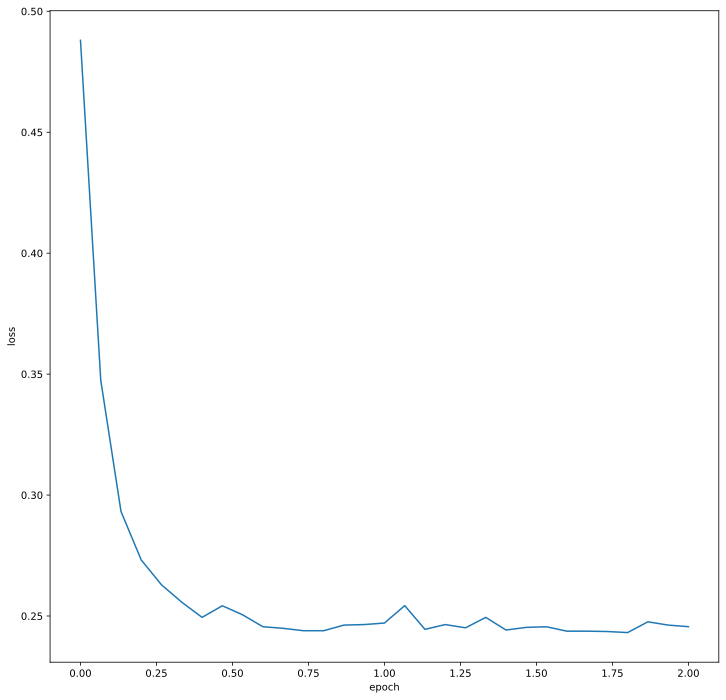

In [85]:
train_sgd(0.005,1)

y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size([1500, 1])
labels torch.Size([1500])
y_hat.shape: torch.Size(

/tmp/ipykernel_855/104467786.py:29: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


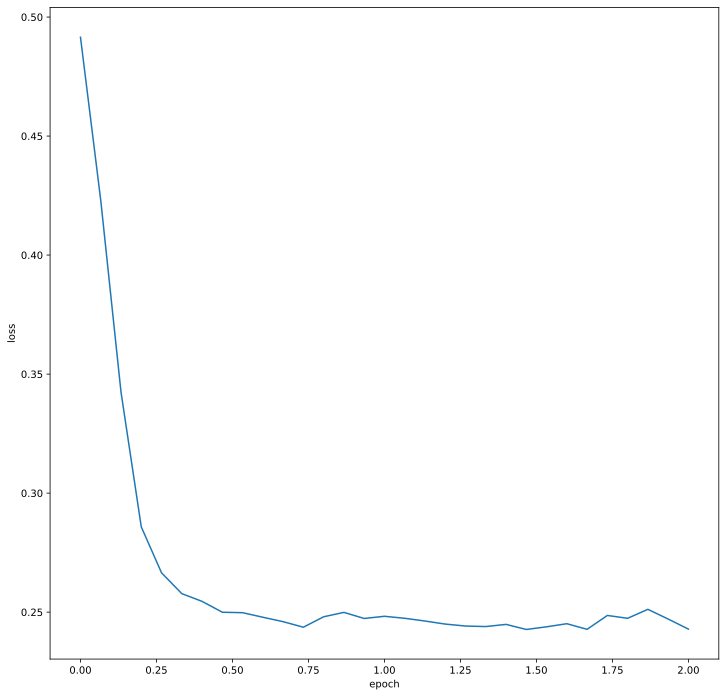

In [86]:
train_sgd(0.05,10)